# Disclaimer: Hier noch mit Namen, später nur noch UserIDs

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM

conn = sqlite3.connect(
    r"C:\Users\max-j\OneDrive\Desktop\Bachelorarbeit_Auswertung\Datenbanken\Auswertung\app_database_2")

queryDataCombinedAvg3 = """SELECT
      UserID,
      Username,
      ScenarioCase,
      (AVG(TimeUntilReached)/1000) AS DurationReachedAvg,
      (AVG(Duration)/1000) AS DurationAvg,
      (AVG(Duration) * 20) AS Duration
      FROM Testing
      GROUP BY UserID, ScenarioCase;"""

DataCombinedAvg3 = pd.read_sql_query(queryDataCombinedAvg3, conn)

# Wie lange haben die einzelnen Nutzer durchschnittlich gebraucht, um das Ziel zu erreichen?

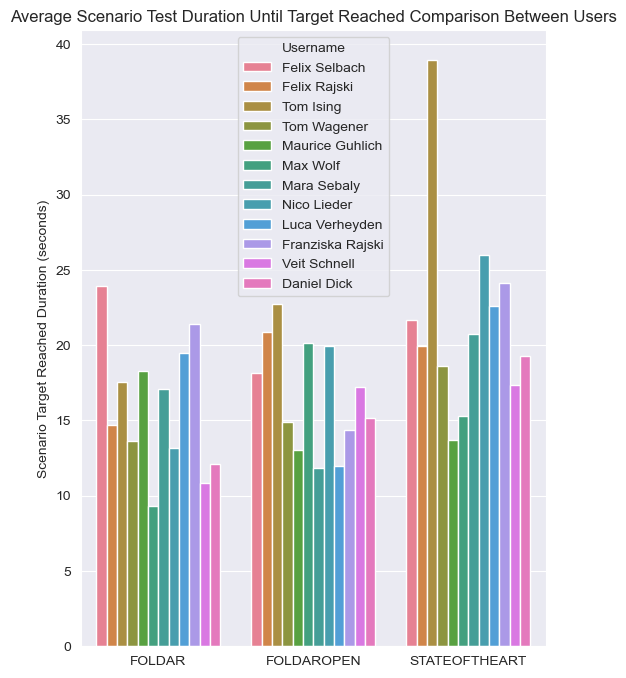

In [3]:
variable = "DurationReachedAvg"

plt.figure(figsize=(6, 8))

# Boxplot Visualization
sns.barplot(
    data=DataCombinedAvg3,
    x='ScenarioCase',
    y=variable,
    hue="Username")

plt.title("Average Scenario Test Duration Until Target Reached Comparison Between Users")
plt.xlabel("")
plt.ylabel("Scenario Target Reached Duration (seconds)")
plt.show()

# Wie viel Zeit haben die Nutzer durchschnittlich für einen Test pro Scenario benötigt?

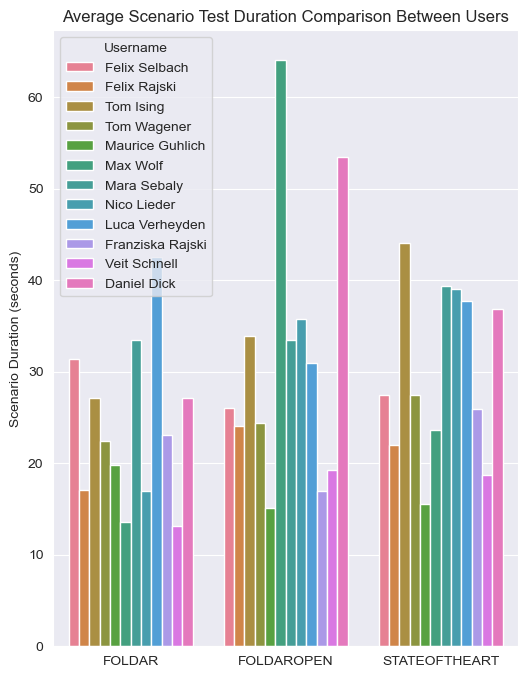

In [4]:
variable = "DurationAvg"

plt.figure(figsize=(6, 8))

# Boxplot Visualization
sns.barplot(
    data=DataCombinedAvg3,
    x='ScenarioCase',
    y=variable,
    hue="Username")

plt.title("Average Scenario Test Duration Comparison Between Users")
plt.xlabel("")
plt.ylabel("Scenario Duration (seconds)")
plt.show()

# Wie lange haben die Nutzer insgesamt für alle Test benötigt?

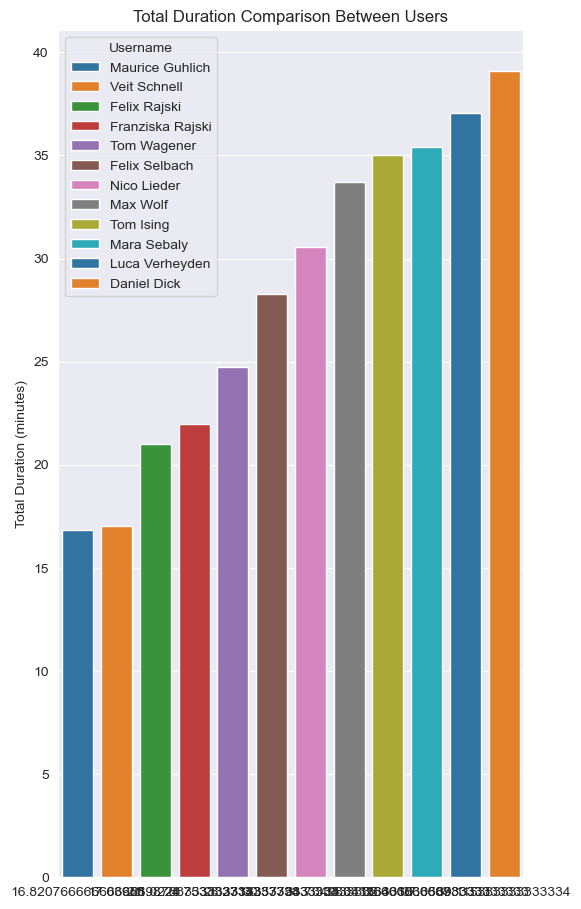

In [7]:
plt.show()
queryDataCombinedAvg4 = """SELECT
    UserID,
    Username,
    ScenarioCase,
    AVG(TimeUntilReached) AS DurationReachedAvg,
    AVG(Duration) AS DurationAvg,
    SUM(AVG(Duration) * 20/1000/60)  OVER (PARTITION BY UserID) AS TotalDurationPerUser
FROM Testing
GROUP BY UserID, Username, ScenarioCase;
"""

DataCombinedAvg4 = pd.read_sql_query(queryDataCombinedAvg4, conn)

variable = "TotalDurationPerUser"

plt.figure(figsize=(6, 11))

# Boxplot Visualization
sns.barplot(
    data=DataCombinedAvg4,
    x=variable,
    y=variable,
    hue="Username",
    palette="tab10"
)

plt.title("Total Duration Comparison Between Users")
plt.xlabel("")
plt.ylabel("Total Duration (minutes)")
plt.show()

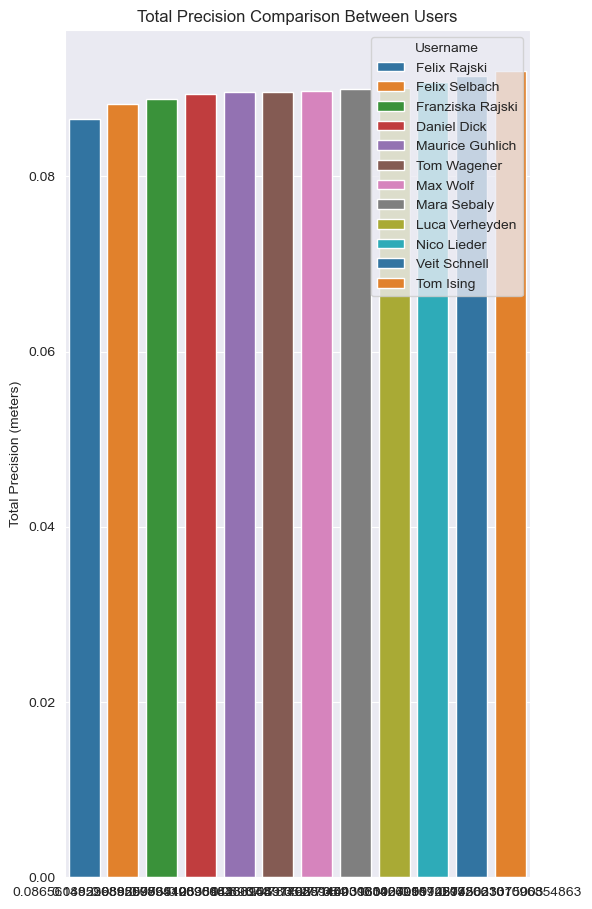

In [47]:
queryDataCombinedAvg5 = """SELECT
    Username,
    UserID,
    AVG(DistanceReached) AS TotalDistancePerUser
FROM DATACOMBINED
GROUP BY UserID, UserID;
"""

DataCombinedAvg5 = pd.read_sql_query(queryDataCombinedAvg5, conn)

variable = "TotalDistancePerUser"

plt.figure(figsize=(6, 11))

# Boxplot Visualization
sns.barplot(
    data=DataCombinedAvg5,
    x="TotalDistancePerUser",
    y=variable,
    hue="Username",
    palette="tab10"
)

plt.title("Total Precision Comparison Between Users")
plt.xlabel("")
plt.ylabel("Total Precision (meters)")
plt.show()

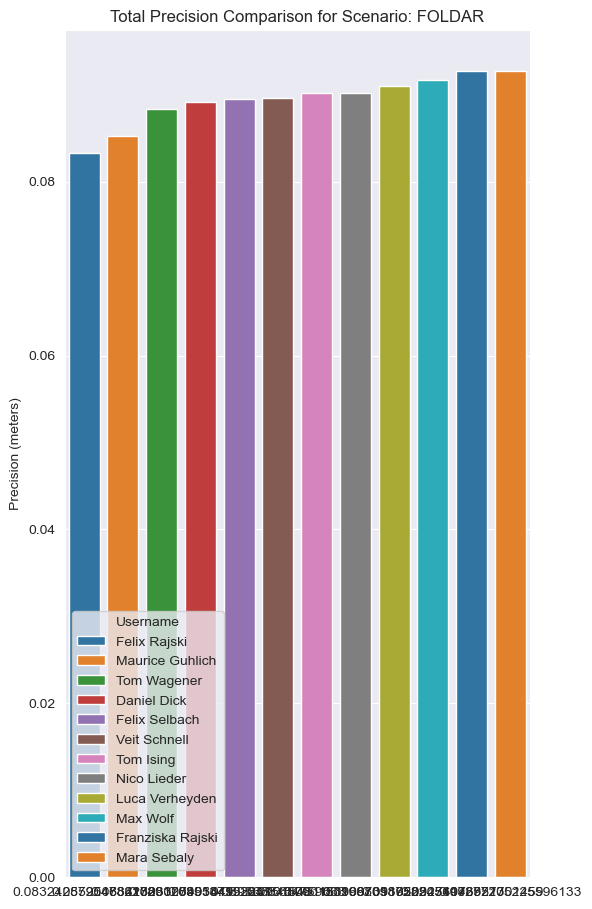

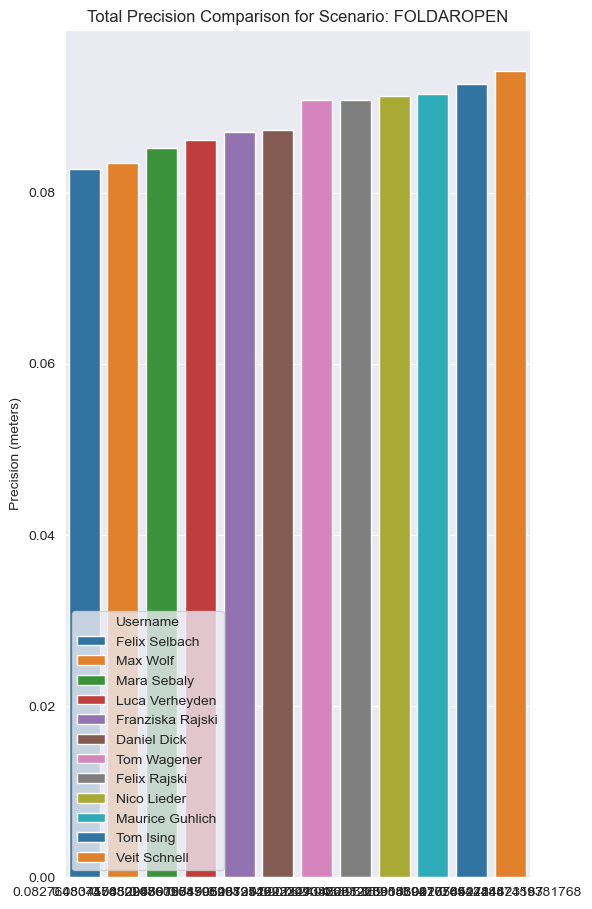

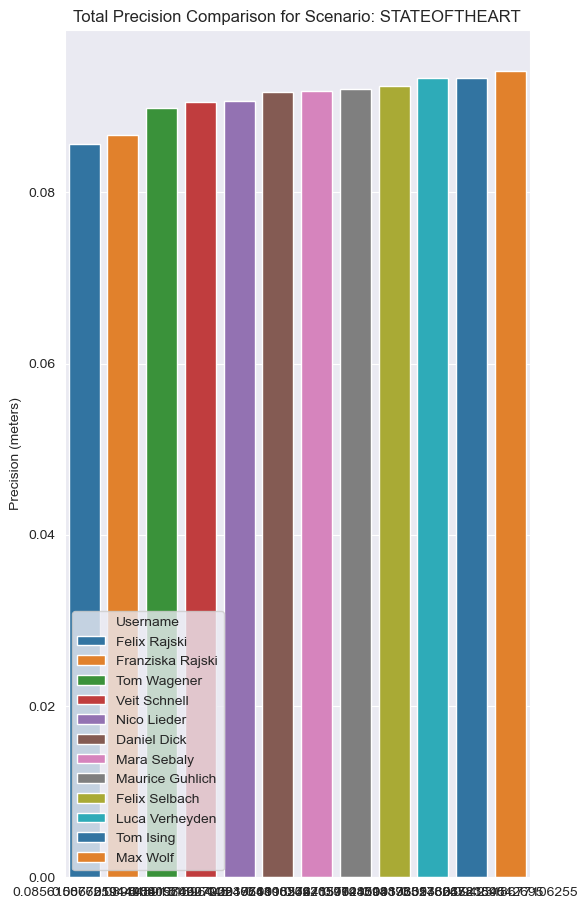

In [43]:
plt.show()
queryDataCombinedAvg6 = """SELECT
Username,
UserID,
DistanceFinished,
ScenarioCase,
AVG(DistanceReached) OVER (PARTITION BY Username, ScenarioCase) AS TotalDistancePerUser
FROM DATACOMBINED
"""

DataCombinedAvg6 = pd.read_sql_query(queryDataCombinedAvg6, conn)

variable = "TotalDistancePerUser"

# Get the unique scenarios from the dataset
scenarios = DataCombinedAvg6['ScenarioCase'].unique()

# Loop through each scenario and create a plot
for scenario in scenarios:
    # Filter data for the current scenario
    scenario_data = DataCombinedAvg6[DataCombinedAvg6['ScenarioCase'] == scenario]
    scenario_data = scenario_data.sort_values(by='TotalDistancePerUser', ascending=True)

    plt.figure(figsize=(6, 11))  # Adjust figure size as needed

    # Barplot visualization for the current scenario
    sns.barplot(
        data=scenario_data,
        x=variable,
        y=variable,
        hue="Username",
        palette="tab10"
    )
    plt.title(f"Total Precision Comparison for Scenario: {scenario}")
    plt.xlabel("")
    plt.ylabel("Precision (meters)")
    plt.show()
